X-Ray imaging devices are very popular in medical imaging systems. There are some X-Ray techniques which are used in several medical imaging applications. Radiography is used for traditional body images, fluroscopy is used for real-time images, mammography is used for breast tissue imaging, angiography is used for heart tissue imaging. X-Ray devices can be fixed type which is supplied from the grid and can be mobile type which is supplied from  aset of battery packs such as 144V, 240V etc.

For a X-Ray imaging system, the main block diagram shown as figure below ;

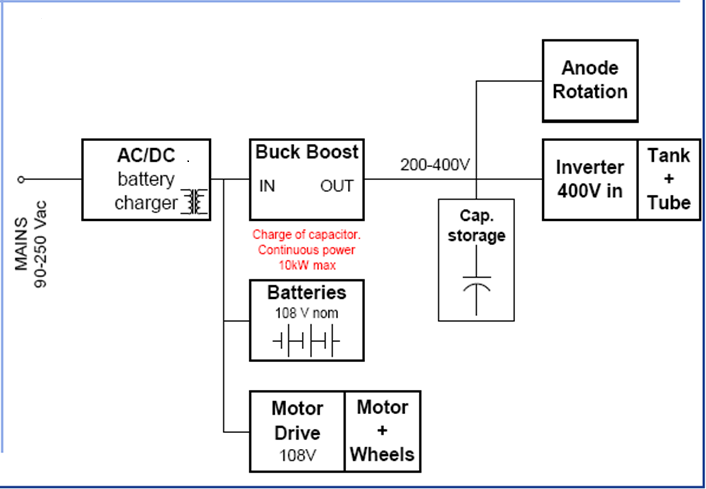

In [3]:
from IPython.display import Image
Image(filename='Blok_Şema.png', width=600, height=500)


For an X-Ray spectrum, it is necessary to apply high voltage ranging between 50-150 kVp to the X-Ray tube. To supply this high voltage to the tube, the most critical parts of the main system are high frequency high voltage transformer and voltage multiplier circuits. Transformer increases frequency from 834 Vp up to 25 kVp and then voltage multiplier circuits multiply 25 kVp voltage to 150 kVp. In the supplement of high power to the X-Ray tube, very big storage capacitors are used (their capacities are around 20-30 mF).

The specifications for the high frequency high voltage transformer as follows ;

✔ Single Phase, High Frequency High Voltage Transformer

✔ Primary Winding Voltage ± 417 V (peak to peak 834 V for pulsing)

✔ Secondary Winding Voltage ± 12.5 kV (peak to peak 25 kV for pulsing)

✔ Rated Power 30 kW (for maximum 100 millisecond)

✔ Switching Frequency Minimum 100 kHz

✔ Ambient Temperature 0-40 °C

High frequency high voltage X-Ray transformer is located in an oil tank with voltage multiplier circuits and resonant inductance of the power circuit.

A general preview for the high voltage tank shown in figure below, 

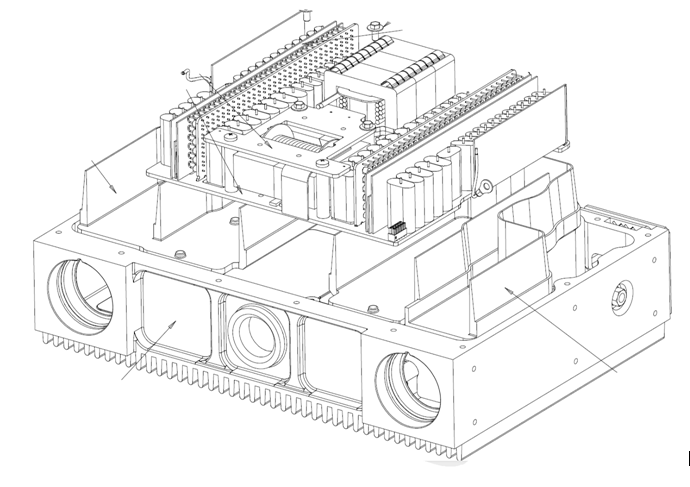

In [2]:
from IPython.display import Image
Image(filename='HV_Tank.png', width=600, height=500)

The output power is not continuous, it will be delivered to the load for maximum 100 milliseconds. Because of this, the transformer efficiency is not very critical parameter in this design. However, we should assume an approximate efficiency value to run our design procedure.

The first step to start designing the high frequency high voltage transformer is selecting a suitable magnetic core.

The properties of the general magnetic materials as follows ; 

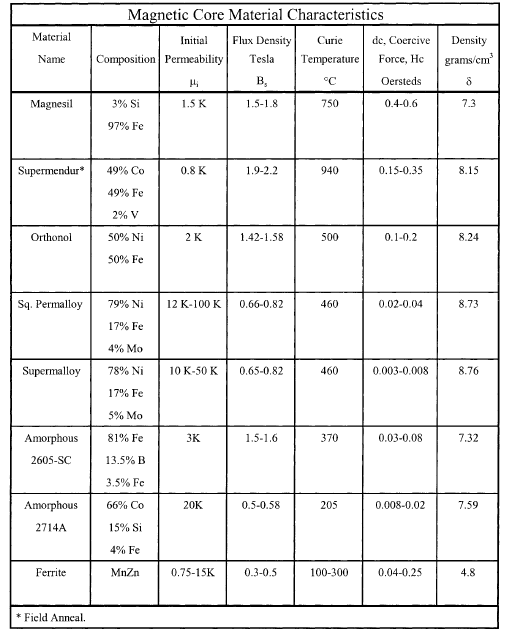

In [3]:
from IPython.display import Image
Image(filename='magnetic_materials.png', width=500, height=600)

In general high frequency applications, ferrite cores are used. Ferrites are ceramic, homogeneous materials composed of oxides; iron oxide is their main constituent. Soft ferrites can be divided into two major categories; manganese-zinc and nickel-zinc. In each of these categories, changing the chemical composition, or manufacturing technology, can manufacture many different Mn-Zn and Ni-Zn material grades.

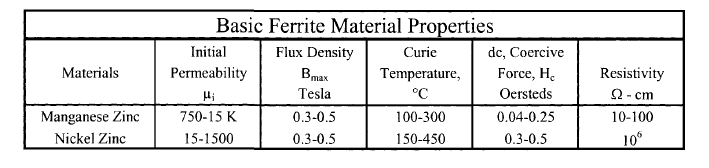

In [5]:
from IPython.display import Image
Image(filename='ferrite_cores.png', width=700, height=700)

For our high frequency high voltage transformer Mn-Zn cores may be suitable material. We may assume that the flux density of the material between 0.3T and 0.5T. 

Now, I can define the parameters of the high frequency high voltage transformer for computations.

In [1]:
V_in=417      #Input voltage in Volts
V_out=12500   #Output voltage in Volts
P_out=30000   #Output power in Watts
f_s=100000    #Switching frequency in Herts
T_amb_min=0   #Minimum ambient temperature in Celcius
T_amb_max=40  #Maximum ambient temperature in Celcius

Some definitions are necessary to apply our procedure ;

In [2]:
import math
V_in_peak=V_in*4/math.pi            #Primary peak voltage
V_in_rms=V_in_peak/math.sqrt(2)     #Primary root mean square voltage
V_out_peak=V_out*4/math.pi          #Secondary peak voltage
V_out_rms=V_out_peak/math.sqrt(2)   #Secondary root mean square voltage
I_out=P_out/V_out                   #Output current
I_out_rms=P_out/V_out_rms           #Output root mean square current
Eff=0.9                             #Efficiency
Reg=0.5                             #Regulation
B_ac=0.32                           #Operating flux density
Ku=0.4                              #Window utilization
Kf=4                                #Square waveform coefficient
D_max=0.5                           #Maximum duty cycle 

In [4]:
import math
S_dp=6.62/math.sqrt(f_s)    #Skin depth
D_aw=2*S_dp                 #Wire diameter
A_w=(math.pi*(D_aw)**2)/4
print ('A_w=',round(A_w,7),'cm^2')

A_w= 0.0013768 cm^2


In this section, we have to choose a wire which has the bare area greater than 0.001376 cm^2. After doing many attemps, with the different wire sizes and core types, wire number 18 seems to be best selection. 

Tables of AWG wire sizes as shown in figure below ;

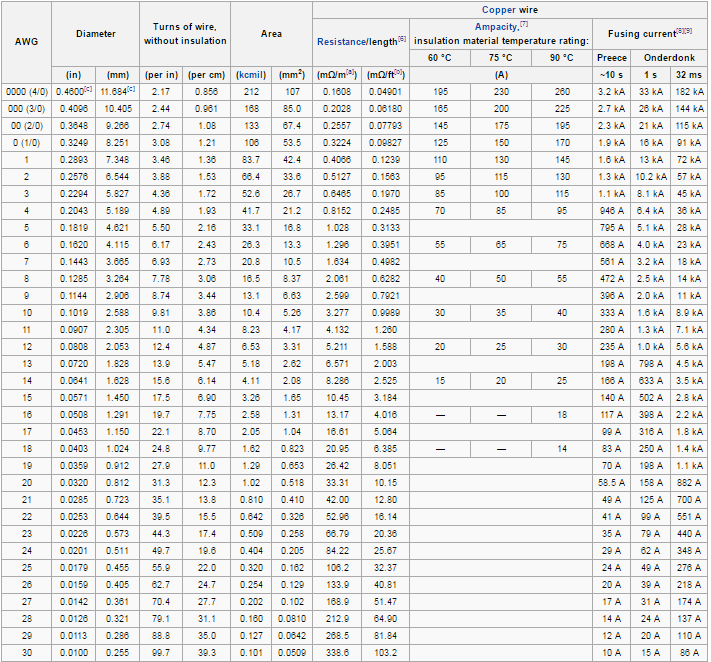

In [19]:
from IPython.display import Image
Image(filename='Wire_table.png', width=700, height=700)

In [5]:
Cu_bare_area=0.008229                #Copper bare area in cm^2
Cu_res=209                           #Copper wire resistance in micro ohm per cm
Cu_weight=0.07474                    #Copper weight in grams per cm

In [7]:
P_in=P_out/Eff                                        #Input power
P_total=P_in+P_out                                    #Output power
Ke=0.145*((Kf)**2)*((f_s)**2)*((B_ac)**2)*(10**-4)    #Electrical condition
Kg_first=P_total/(2*Ke*Reg)                           #Core geometry
Kg = Kg_first*1.35                                    #New core geometry
print('Kg=',round(Kg,4),'cm^5')


Kg= 0.3599 cm^5


Operating at 100 kHz and having to use a number 18 wire, because of the skin effect, the overall window utilization is reduced. To return the design back to the norm, the core geometry is to be multiplied by a factor of 1.35

Similar to the wire size selection, now we have to choose a suitable core type which has core geometry greater than 0.35989. After many attempts to determine the best core type, it is decided to use ER-54 core type which gives best utilization. The core material is N87.

The construction of the core is shown in figure below ;

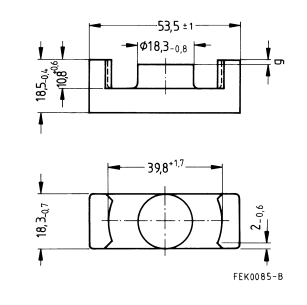

In [8]:
from IPython.display import Image
Image(filename='ER-54.png', width=400, height=400)

Let's define core parameters

In [9]:
Wt_fe=122              #Core weight in grams
Wt_cu=101.9            #Copper weight in grams
MLT=11.4               #Mean lenght turn in cm
Ac=2.4                 #Iron area in cm^2
Ap=6.0606              #Area product in cm^4
At=60.7                #Surface area in cm^2
Wa=2.525               #window area in cm^2

In [10]:
Np_first=(V_in*10**4)/(Kf*B_ac*f_s*Ac)
Np=math.ceil(Np_first)                     #Primary number of turns using Faraday's Law
print('Np=',Np,'turns')

Np= 14 turns


In [17]:
J=((P_total)*(10**4))/(Kf*Ku*B_ac*f_s*Ap)   #Current density in amps/cm^2
I_in=(P_out)/(V_in*Eff)                     #Input Current in amps
Awp_B= (I_in*math.sqrt(D_max))/J            #Primary bare wire area in cm^2
S_np_first=Awp_B/Cu_bare_area 
S_np=math.floor(S_np_first)                 #Primary strand
print('S_np=',S_np)
Cu_res_new_pri=Cu_res /S_np                 #Primary new micro ohms per cm
Rp=MLT*Np*Cu_res_new_pri*(10**-6)           #Primary resistance in ohms
Pp=(I_in**2)*Rp                             #Primary copper loss in Watts
Ns_first = ((Np)*(V_out_peak)*(1+(Reg/100)))/(V_in_peak)
Ns=math.floor(Ns_first)                     #Secondary number of turns
print('Ns=',Ns,'turns')
print('Primary reistance=',round(Rp,4),'ohms')

S_np= 2
Ns= 421 turns
Primary reistance= 0.0167 ohms


In [18]:
Aws_B=(I_out)*(math.sqrt(D_max))/J       #Secondary bare wire area in cm^2
S_ns_first=Aws_B/Cu_bare_area            #Secondary number of strands
S_ns=math.ceil(S_ns_first)
print('S_ns=',S_ns)
Cu_res_new_sec=Cu_res/S_ns               #Secondary new micro ohms per cm
Rs=(MLT)*Ns*Cu_res_new_sec*(10**-6)      #Secondary resistance in ohms
print('Secondary reistance=',round(Rs,4),'ohms')
Ps=(I_out**2)*Rs                         #Secondary copper loss in Watts
Pcu=Pp+Ps                                #Total primary and secondary copper loss in Watts
print('Pcu=',round(Pcu,3),'W')

S_ns= 1
Secondary reistance= 1.0031 ohms
Pcu= 112.348 W


In [14]:
alpha=(Pcu/P_out)*100                            #transformer regulation
mw_per_gr=0.000318*((f_s)**1.51)*((B_ac)**2.747) #milliwatts per gram
Pfe=(mw_per_gr)*(Wt_fe)*(10**-3)                 #core loss
print('Pfe=',round(Pfe,3),'W')
P_final=Pcu+Pfe                                  #total loss
print('P_final=',round(P_final,3),'W')
watts_per_unit_area=P_final/At                   #watts per unit area
Tr_analyt=450*((watts_per_unit_area)**0.826)     #temperature rise analytically
Tr_real=(450/20)*((watts_per_unit_area)**0.826)  #temperature rise estimation in real
print('Tr=',round(Tr_real,3),'°C')
Ku_sec=(Ns*S_ns*Aws_B)/(Wa)                      #secondary window utilization
Ku_pri=(Np*S_np*Awp_B)/(Wa)                      #primary window utilization
Ku_total=Ku_sec+Ku_pri                           #total window utilization
print('Ku_total=',round(Ku_total,3))

Pfe= 60.177 W
P_final= 172.525 W
Tr= 53.322 °C
Ku_total= 0.323


At this stage, I make an assumption. The temperature rise above is the temperature rise value which is calculated when the transformer is thought to be working continuously. However, our transformer will not work exactly 30 kW continuosly.When the transformer works at 30 kW power, the duration of this power transfer is a few ten milliseconds level. Because of this situation, the real temperature rise is thougth to be twentieth of the calculated value. Our transformer is located in an oil tank. The expected temperature will be absorbed by means of cooling and isolation of the oil. 

Now, we can calculate teh wire lenght, total mass of the transformer.

In [15]:
Wire_lenght=(S_np*Np*MLT)+(S_ns*Ns*MLT)   #Wire lenght
print('Wire lenght=',round(Wire_lenght,3),'cm')
Mass=Wt_fe+Wt_cu+(Wire_lenght*Cu_weight)  #Total mass
print('Total mass=',round(Mass,3),'gr')

Wire lenght= 5118.6 cm
Total mass= 606.464 gr
